In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.

In [2]:
df = pd.read_csv("dataset.csv")
df.drop("Unnamed: 0",inplace=True,axis=1)

In [3]:
df.head()

,PSH Flag Count,Destination Port,Avg Bwd Segment Size,min_seg_size_forward,Packet Length Std,Init_Win_bytes_forward,Bwd Packet Length Mean,Idle Min,Bwd Packet Length Std,Bwd Packet Length Max,...,Min Packet Length,Max Packet Length,Fwd Packets/s,act_data_pkt_fwd,Flow IAT Std,Down/Up Ratio,Fwd IAT Mean,Fwd Header Length,Flow Packets/s,Label
0,0,49188,0.0,20,0.0,329,0.0,0,0.0,0,...,6,6,5.000000e+05,1,0.0,0,4.0,40,5.000000e+05,0
1,0,49188,0.0,20,0.0,329,0.0,0,0.0,0,...,6,6,2.000000e+06,1,0.0,0,1.0,40,2.000000e+06,0
2,0,49188,0.0,20,0.0,329,0.0,0,0.0,0,...,6,6,2.000000e+06,1,0.0,0,1.0,40,2.000000e+06,0
3,0,49188,0.0,20,0.0,329,0.0,0,0.0,0,...,6,6,2.000000e+06,1,0.0,0,1.0,40,2.000000e+06,0
4,0,49486,0.0,20,0.0,245,0.0,0,0.0,0,...,6,6,6.666667e+05,1,0.0,0,3.0,40,6.666667e+05,0


In [4]:
# Summary of information on the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827876 entries, 0 to 2827875
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   PSH Flag Count          int64  
 1   Destination Port        int64  
 2   Avg Bwd Segment Size    float64
 3   min_seg_size_forward    int64  
 4   Packet Length Std       float64
 5   Init_Win_bytes_forward  int64  
 6   Bwd Packet Length Mean  float64
 7   Idle Min                int64  
 8   Bwd Packet Length Std   float64
 9   Bwd Packet Length Max   int64  
 10  Average Packet Size     float64
 11  Flow IAT Max            int64  
 12  Bwd Packet Length Min   int64  
 13  ACK Flag Count          int64  
 14  Idle Mean               float64
 15  Idle Max                int64  
 16  Fwd IAT Max             int64  
 17  Fwd IAT Std             float64
 18  Packet Length Mean      float64
 19  Packet Length Variance  float64
 20  Flow Duration           int64  
 21  Min Packet Length       int64  

In [5]:
##Train Test Split
train_dataset, temp_test_dataset =  train_test_split(df, test_size=0.4)

In [6]:
##Validation Split
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)

In [7]:
train_labels1 = train_dataset.pop('Label')
test_labels1 = test_dataset.pop('Label')
valid_labels1 = valid_dataset.pop('Label')

In [8]:
# Encode the labeles
train_labels = pd.get_dummies(train_labels1, prefix='Label')
valid_labels = pd.get_dummies(valid_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')

train_labels

,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8,Label_9,Label_10,Label_11,Label_12,Label_13,Label_14
1226325,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1175030,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2749916,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112256,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2172990,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704892,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
712758,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2309863,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1223308,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [9]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
#train_stats.pop("Label")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
PSH Flag Count,1696725.0,2.982322e-01,4.574821e-01,0.000000e+00,0.000000,0.000000,1.000000e+00,1.000000e+00
Destination Port,1696725.0,8.060768e+03,1.827303e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Avg Bwd Segment Size,1696725.0,3.056571e+02,6.046633e+02,0.000000e+00,2.000000,72.000000,1.810000e+02,5.800500e+03
min_seg_size_forward,1696725.0,-2.248112e+03,9.525906e+05,-5.368707e+08,20.000000,24.000000,3.200000e+01,1.380000e+02
Packet Length Std,1696725.0,2.947691e+02,6.312231e+02,0.000000e+00,0.000000,25.980762,1.746950e+02,4.731522e+03
Init_Win_bytes_forward,1696725.0,7.007526e+03,1.436183e+04,-1.000000e+00,-1.000000,251.000000,8.192000e+03,6.553500e+04
Bwd Packet Length Mean,1696725.0,3.056571e+02,6.046633e+02,0.000000e+00,2.000000,72.000000,1.810000e+02,5.800500e+03
Idle Min,1696725.0,7.913953e+06,2.335516e+07,0.000000e+00,0.000000,0.000000,0.000000e+00,1.200000e+08
Bwd Packet Length Std,1696725.0,3.347451e+02,8.381199e+02,0.000000e+00,0.000000,0.000000,7.800000e+01,8.194660e+03
Bwd Packet Length Max,1696725.0,8.697375e+02,1.943715e+03,0.000000e+00,2.000000,79.000000,2.800000e+02,1.953000e+04


In [10]:
# define a function to normalize the data set.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [11]:
# show a sample of the data after normalized
normed_train_data.head(10)

,PSH Flag Count,Destination Port,Avg Bwd Segment Size,min_seg_size_forward,Packet Length Std,Init_Win_bytes_forward,Bwd Packet Length Mean,Idle Min,Bwd Packet Length Std,Bwd Packet Length Max,...,Flow Duration,Min Packet Length,Max Packet Length,Fwd Packets/s,act_data_pkt_fwd,Flow IAT Std,Down/Up Ratio,Fwd IAT Mean,Fwd Header Length,Flow Packets/s
1226325,-0.651899,-0.436751,2.690494,0.002381,2.174836,-0.470450,2.690494,3.934294,2.202863,2.532399,...,2.526348,-0.650813,2.389080,-0.258237,-0.005363,3.217766,-1.003011,1.467175,0.001490,-0.278691
1175030,-0.651899,-0.436751,-0.505500,0.002394,-0.466981,-0.470450,-0.505500,-0.338853,-0.399400,-0.447461,...,-0.439271,-0.650813,-0.468596,7.813753,-0.008440,-0.362741,-1.003011,-0.273883,0.001460,7.581413
2749916,1.533979,2.771749,-0.484000,0.002381,3.732146,0.082474,-0.484000,-0.338853,-0.387588,-0.437172,...,-0.433456,-0.650813,3.091164,-0.258114,-0.002285,-0.353593,-1.003011,-0.269779,0.001475,-0.278530
112256,1.533979,-0.416886,0.297633,0.002394,0.216911,4.075209,0.297633,-0.338853,0.348988,0.297504,...,-0.433908,-0.650813,0.245823,-0.257947,0.000792,-0.360861,-1.003011,-0.272306,0.001529,-0.278234
2172990,-0.651899,-0.438229,-0.348387,0.002394,-0.409712,-0.487997,-0.348387,-0.338853,-0.399400,-0.398586,...,-0.439263,0.497077,-0.421725,-0.226829,-0.006901,-0.362729,0.462498,-0.273882,0.001460,-0.217523
2458589,1.533979,-0.112612,-0.495577,0.002385,-0.463322,-0.416627,-0.495577,-0.338853,-0.399400,-0.444375,...,-0.439271,-0.571649,-0.465636,0.246262,-0.008440,-0.362741,0.462498,-0.273884,0.001452,0.703822
2651552,1.533979,-0.436751,4.293452,0.002381,6.024444,0.082474,4.293452,-0.338853,6.515483,5.517920,...,-0.422143,-0.650813,5.252183,-0.258217,-0.005363,-0.333535,0.462498,-0.273852,0.001462,-0.278643
1265509,-0.651899,-0.436751,2.233924,0.002381,1.844360,-0.487927,2.233924,3.232093,1.701251,1.787434,...,2.042580,-0.650813,1.674661,-0.258237,-0.003824,2.633447,0.462498,1.477663,0.001479,-0.278690
2509678,1.533979,-0.392533,-0.495577,0.002402,-0.461493,1.545239,-0.495577,-0.338853,-0.399400,-0.444375,...,-0.439270,-0.650813,-0.465636,-0.168549,-0.008440,-0.362741,0.462498,-0.273884,0.001455,-0.104022
1560925,-0.651899,1.721621,-0.505500,0.002394,-0.466981,-0.420248,-0.505500,-0.338853,-0.399400,-0.447461,...,-0.439270,-0.650813,-0.468596,-0.074783,-0.008440,-0.362741,0.462498,-0.273884,0.001454,0.078586


In [12]:
%%time

def build_model():
    model = Sequential()
    model.add(Dense(30, input_shape = (normed_train_data.shape[1],)))           
    model.add(Dense(15, activation='softmax'))                          
    learning_rate = 0.0001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']) 
    return model


EPOCHS = 5
batch_size = 16 

model = build_model()
print('Here is a summary of this model: ')
model.summary()


with tf.device('/CPU:0'): 
    history = model.fit(
        normed_train_data, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=1,
        shuffle=True,
        steps_per_epoch = int(normed_train_data.shape[0] / batch_size) ,
        validation_data = (normed_valid_dataset, valid_labels),   
    )

Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
Total params: 1,395
Trainable params: 1,395
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
106045/106045 [==============================] - 282s 3ms/step - loss: 0.2770 - accuracy: 0.9247 - val_loss: 0.3534 - val_accuracy: 0.9407
Epoch 2/5
106045/106045 [==============================] - 277s 3ms/step - loss: 0.2023 - accuracy: 0.9456 - val_loss: 0.3254 - val_accuracy: 0.9511
Epoch 3/5
106045/106045 [==============================] - 277s 3ms/step - loss: 0.1871 - accuracy: 0.9506 - val_loss:

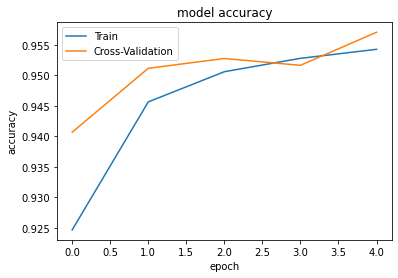

In [13]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

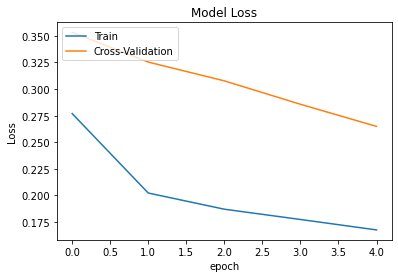

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [15]:
print('Train Split: ')
loss, accuracy = model.evaluate(normed_train_data, train_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
53023/53023 [==============================] - 100s 2ms/step - loss: 0.1632 - accuracy: 0.9572
Accuracy   :  0.96 


In [16]:
print('Evaluation Split: ')
loss, accuracy =  model.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
17675/17675 - 28s - loss: 0.2649 - accuracy: 0.9570 - 28s/epoch - 2ms/step
Accuracy   :  0.96 


In [17]:
print('Test Split: ')
loss, accuracy =  model.evaluate(normed_test_data, test_labels, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 
17675/17675 - 28s - loss: 0.2044 - accuracy: 0.9568 - 28s/epoch - 2ms/step
Accuracy   :  0.96


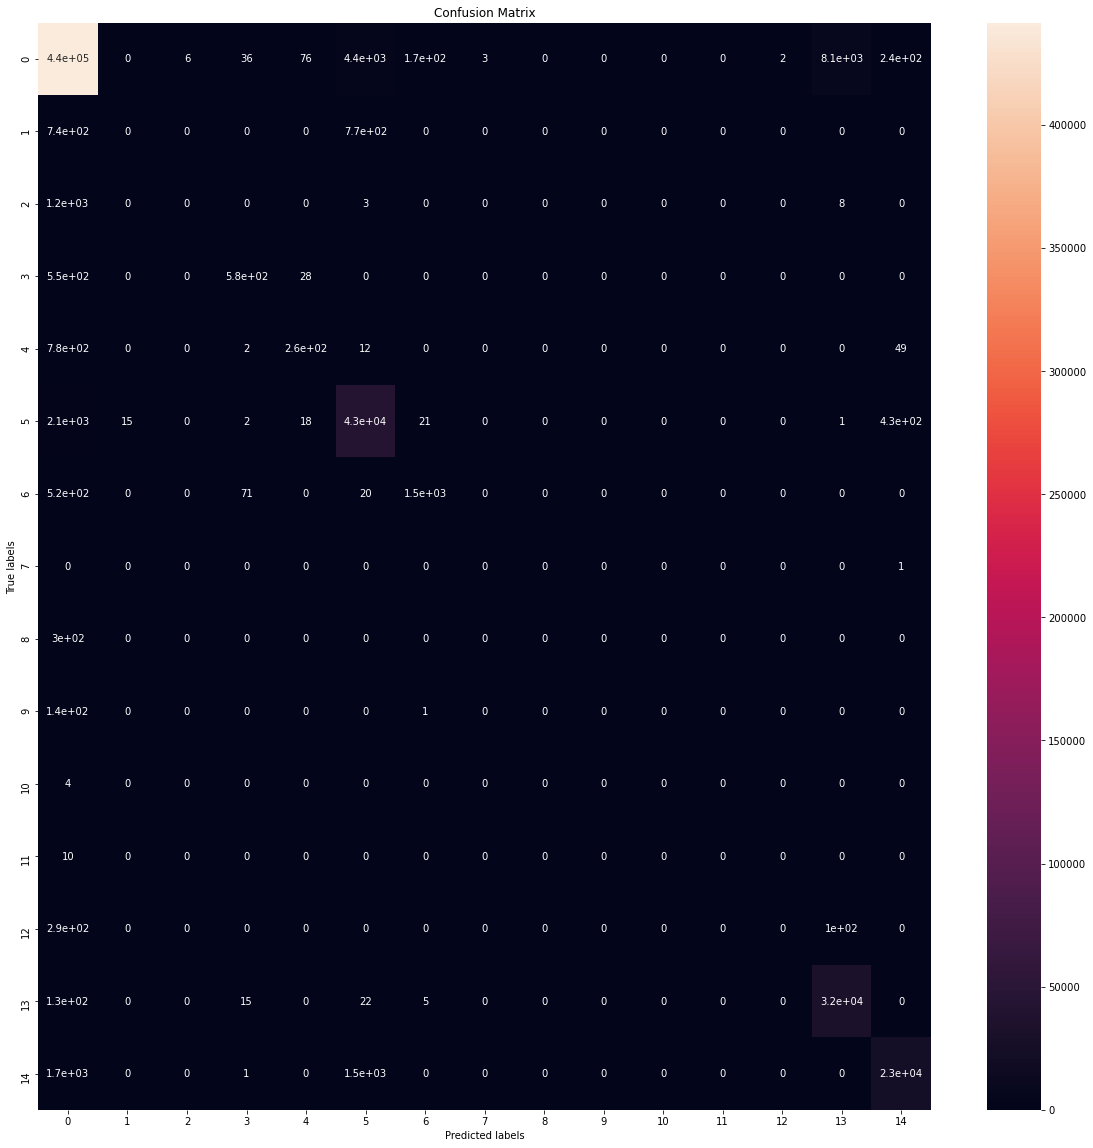

In [18]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(20, 20))
ax= plt.subplot()
predict_results = model.predict(normed_test_data)


predict_results= predict_results.argmax(axis = 1)

cm = confusion_matrix(test_labels1, predict_results)

sns.heatmap(cm, annot=True, ax = ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 